### multi classification OvR(OvA)
- classification class 수만큼 bianry classifier 생성

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

- datasets: load_digits
    - 내장 datasets
    - image datasets => 8 * 8 size image, 1D, feature len is 64
    - image label => number 0 to 9, class len is 10.
    - gray image

In [12]:
feature_df,label_sr = load_digits(as_frame=True, return_X_y=True)
feature_df = feature_df / 255 # scaling

print(f"feature: {feature_df.shape}, {feature_df.ndim}D")
print(f"label: {label_sr.shape}, {label_sr.ndim}D")

feature: (1797, 64), 2D
label: (1797,), 1D


In [13]:
feature_df.head(1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.019608,0.05098,0.035294,0.003922,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.023529,0.05098,0.039216,0.0,0.0,0.0


In [14]:
label_sr.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [15]:
from matplotlib import pyplot as plt

In [16]:
image_data = feature_df.iloc[0].to_numpy().reshape(-1, 8)
print(f"image data: {image_data.shape}, {image_data.ndim}D")

image data: (8, 8), 2D


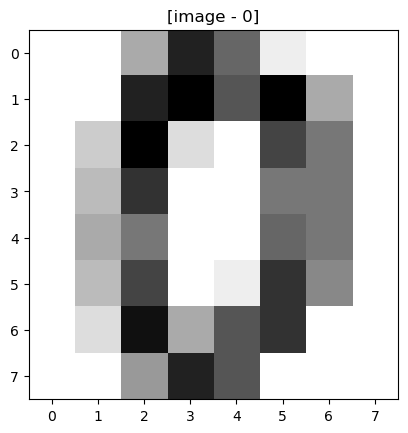

In [17]:
plt.imshow(image_data, cmap='binary')
plt.title(f"[image - {label_sr[0]}]")
plt.show()

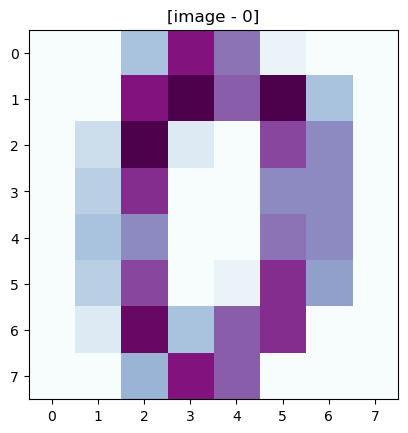

In [29]:
plt.imshow(image_data, cmap='BuPu')
plt.title(f"[image - {label_sr[0]}]")
plt.show()

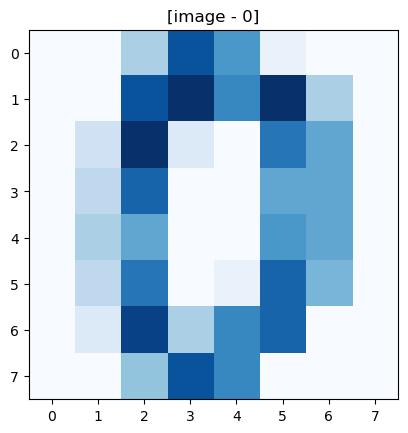

In [30]:
plt.imshow(image_data, cmap='Blues')
plt.title(f"[image - {label_sr[0]}]")
plt.show()

In [20]:
# trainDS, testDS
# train : test = 75 : 25
# stratify: label_sr
# random_state: 52
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, stratify=label_sr, random_state=52)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D")
print(f"train test ratio: {len(X_train)/len(feature_df)*100:.2f} %, {len(X_test)/len(feature_df)*100:.2f} %")

X train: (1347, 64), 2D
y train: (1347,), 1D
X test: (450, 64), 2D
y test: (450,), 1D
train test ratio: 74.96 %, 25.04 %


In [19]:
# OvR, OvA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))    # max_iter: max learning number/count
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [22]:
# model parameter
print(f"estimators_: {len(ovr_clf.estimators_)} 개")
print(f"classes_: {ovr_clf.classes_}")
print(f"n_classes_: {ovr_clf.n_classes_}")
print(f"label_binarizer_: {ovr_clf.label_binarizer_}")

estimators_: 10 개
classes_: [0 1 2 3 4 5 6 7 8 9]
n_classes_: 10
label_binarizer_: LabelBinarizer(sparse_output=True)


In [33]:
from scipy.special import expit

In [38]:
for idx in range(ovr_clf.n_classes_):
    print(f"[{idx} classifier]\n", ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_, '\n')
    print('선형식의 값: ', ovr_clf.estimators_[idx].decision_function(X_train.iloc[:1]))
    print('확률 변환값: ', expit(ovr_clf.decision_function(X_train.iloc[:1])))
    print('확률값: ', ovr_clf.predict_proba(X_train.iloc[:1]), '\n\n')

[0 classifier]
 [[ 0.00000000e+00 -1.13836501e-01 -3.72320466e-01  5.49618095e-01
  -2.29003783e-01 -1.25527119e+00 -5.44487188e-01 -4.81426969e-02
  -2.37318477e-03 -4.26929598e-01  9.54902478e-01  6.14506103e-01
   7.75712427e-01  1.48248548e+00 -3.59319823e-01 -4.46376331e-02
  -1.63478391e-03  5.03782056e-01  1.67948444e+00 -6.85681565e-01
  -1.88905097e+00  1.89747588e+00  6.94333621e-01 -2.25243357e-02
  -6.02989788e-04  1.17081889e+00  1.24884080e+00 -2.82740385e+00
  -4.00463823e+00  3.77286921e-01  1.76493596e+00 -1.34399087e-03
   0.00000000e+00  1.43380885e+00  1.50939193e+00 -3.31870932e+00
  -4.20713609e+00 -4.28776644e-01  1.75687645e+00  0.00000000e+00
  -6.83441666e-03  7.05535837e-01  2.56344733e+00 -2.24627876e+00
  -2.52575105e+00  9.19251828e-01  9.20057722e-01 -1.33381031e-02
  -6.42820013e-03  9.59599901e-03  2.21195404e+00  2.91292096e-01
   4.68503980e-01  1.73428575e+00 -6.48254365e-01 -8.37272190e-02
  -3.45481621e-04 -1.12527859e-01 -5.79108088e-01  6.0314849

In [26]:
ovr_clf.predict_proba(X_test.iloc[:2])  # probability value

array([[0.11434261, 0.0925686 , 0.08589542, 0.14164049, 0.05974467,
        0.06898497, 0.07778339, 0.0793957 , 0.09628586, 0.1833583 ],
       [0.21770438, 0.05941973, 0.08642007, 0.09489676, 0.0901711 ,
        0.10634214, 0.08308624, 0.08943742, 0.08147683, 0.09104534]])

In [32]:
ovr_clf.predict_proba(X_test.iloc[:1]).argmax(), ovr_clf.predict_proba(X_test.iloc[:1]).max()

(9, 0.18335829668815298)

In [39]:
import numpy as np

In [43]:
np.maximum(y_test[:1], ovr_clf.predict(X_test.iloc[:1]))

1356    9
Name: target, dtype: int32